In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-01-30 12:21:43.692758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 12:21:44.852747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 12:21:45.554543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738236106.233516  128706 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738236106.398504  128706 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 12:21:48.060055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2025-01-30 12:22:11.847277: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
24/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1912 - loss: 2.2563 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1920 - loss: 2.2159 - val_accuracy: 0.2614 - val_loss: 1.9969
Epoch 2/1000
29/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 2.0199 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2392 - loss: 2.0110 - val_accuracy: 0.3214 - val_loss: 1.8916
Epoch 3/1000
27/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2815 - loss: 1.9159 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2804 - loss: 1.9085 - val_accuracy: 0.3521 - val_loss: 1.7839
Epoch 4/1000
25/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.8349 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5701 - loss: 1.1629 - val_accuracy: 0.7981 - val_loss: 0.8144
Epoch 25/1000
29/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5334 - loss: 1.1843 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5374 - loss: 1.1789 - val_accuracy: 0.8011 - val_loss: 0.8023
Epoch 26/1000
26/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 1.1527 
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5665 - loss: 1.1507 - val_accuracy: 0.8037 - val_loss: 0.7803
Epoch 27/1000
38/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5698 - loss: 1.1544
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5702 - loss: 1.1514 - val_accuracy: 0.8175 - val_loss: 0.7674
Epoch 28/1000
39/46 ━━━━━━━━━━━━━━━━━━━━ 0s

28/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6062 - loss: 1.0812 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6092 - loss: 1.0758 - val_accuracy: 0.8385 - val_loss: 0.6769
Epoch 49/1000
29/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 1.0562 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6043 - loss: 1.0562 - val_accuracy: 0.8370 - val_loss: 0.6694
Epoch 50/1000
24/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6145 - loss: 1.0354 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6125 - loss: 1.0377 - val_accuracy: 0.8262 - val_loss: 0.6698
Epoch 51/1000
25/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6099 - loss: 1.0642 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6344 - loss: 1.0169 - val_accuracy: 0.8452 - val_loss: 0.6267
Epoch 72/1000
23/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - loss: 1.0154 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6363 - loss: 1.0175 - val_accuracy: 0.8385 - val_loss: 0.6255
Epoch 73/1000
30/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 1.0242 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6216 - loss: 1.0229 - val_accuracy: 0.8309 - val_loss: 0.6265
Epoch 74/1000
30/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 0.9960 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6399 - loss: 0.9990 - val_accuracy: 0.8411 - val_loss: 0.6139
Epoch 75/1000
30/46 ━━━━━━━━━━━━━━━━━━━━ 0

24/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 1.0093 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6381 - loss: 1.0047 - val_accuracy: 0.8519 - val_loss: 0.5857
Epoch 96/1000
25/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - loss: 0.9913 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6422 - loss: 0.9914 - val_accuracy: 0.8503 - val_loss: 0.5953
Epoch 97/1000
26/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.9826 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6422 - loss: 0.9887 - val_accuracy: 0.8447 - val_loss: 0.5963
Epoch 98/1000
26/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6668 - loss: 0.9475 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6457 - loss: 0.9585 - val_accuracy: 0.8606 - val_loss: 0.5776
Epoch 119/1000
28/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6626 - loss: 0.9336 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6547 - loss: 0.9488 - val_accuracy: 0.8539 - val_loss: 0.5711
Epoch 120/1000
27/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.9494 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6433 - loss: 0.9579 - val_accuracy: 0.8667 - val_loss: 0.5718
Epoch 121/1000
24/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - loss: 0.9852 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6512 - loss: 0.9780 - val_accuracy: 0.8539 - val_loss: 0.5657
Epoch 122/1000
24/46 ━━━━━━━━━━━━━━━

Epoch 142/1000
23/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - loss: 0.9699 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6448 - loss: 0.9679 - val_accuracy: 0.8688 - val_loss: 0.5673
Epoch 143/1000
26/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.9798 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6450 - loss: 0.9708 - val_accuracy: 0.8647 - val_loss: 0.5606
Epoch 144/1000
38/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 0.9727
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6501 - loss: 0.9717 - val_accuracy: 0.8631 - val_loss: 0.5689
Epoch 145/1000
43/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.9682
Epoch 145: saving model to model/keypoint_classifier/keypoint_cl

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6481 - loss: 0.9343 - val_accuracy: 0.8693 - val_loss: 0.5679
Epoch 166/1000
43/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - loss: 0.9230
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6478 - loss: 0.9244 - val_accuracy: 0.8703 - val_loss: 0.5650
Epoch 167/1000
26/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - loss: 0.9587 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6491 - loss: 0.9599 - val_accuracy: 0.8688 - val_loss: 0.5673
Epoch 168/1000
27/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - loss: 0.9628 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6532 - loss: 0.9678 - val_accuracy: 0.8693 - val_loss: 0.5780
Epoch 169/1000
26/46 ━━━━━━━━━━━━━━━━

Epoch 189/1000
44/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - loss: 0.9494
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6551 - loss: 0.9498 - val_accuracy: 0.8739 - val_loss: 0.5555
Epoch 190/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.9115
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6675 - loss: 0.9117 - val_accuracy: 0.8734 - val_loss: 0.5561
Epoch 191/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - loss: 0.9328
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6653 - loss: 0.9328 - val_accuracy: 0.8719 - val_loss: 0.5616
Epoch 192/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.9337
Epoch 192: saving model to model/keypoint_classifier/keypoint_clas

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.5493 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[1.7720874e-02 7.4490649e-01 2.3128651e-01 1.0470975e-08 1.4813647e-03
 2.4832983e-04 1.9281363e-10 1.0246585e-10 4.3563172e-03]
1


# 混同行列

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


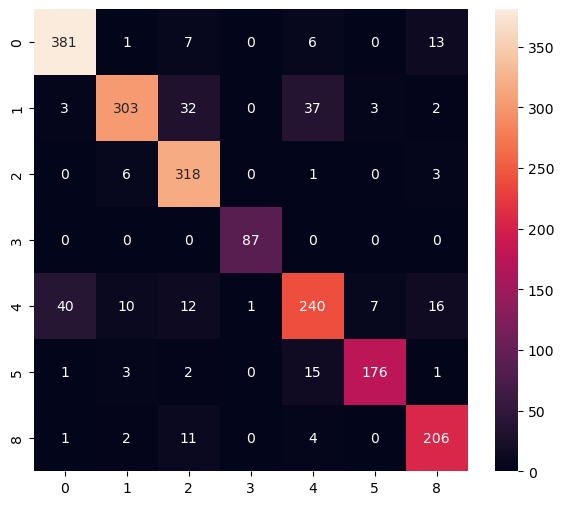

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       408
           1       0.93      0.80      0.86       380
           2       0.83      0.97      0.90       328
           3       0.99      1.00      0.99        87
           4       0.79      0.74      0.76       326
           5       0.95      0.89      0.92       198
           8       0.85      0.92      0.89       224

    accuracy                           0.88      1951
   macro avg       0.89      0.89      0.89      1951
weighted avg       0.88      0.88      0.88      1951



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmphji4_lip/assets


INFO:tensorflow:Assets written to: /tmp/tmphji4_lip/assets


Saved artifact at '/tmp/tmphji4_lip'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  140314634257616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140314634261456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140314634260880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140314634272592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140314634271056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140314634270672: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1738236189.507878  128706 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1738236189.507911  128706 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-30 12:23:09.508354: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmphji4_lip
2025-01-30 12:23:09.509228: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-30 12:23:09.509251: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmphji4_lip
I0000 00:00:1738236189.513940  128706 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-01-30 12:23:09.514885: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-30 12:23:09.553370: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmphji4_lip
2025-01-30 12:23:09.562449: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

6776

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 454 µs, sys: 38 µs, total: 492 µs
Wall time: 1.24 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7720863e-02 7.4490666e-01 2.3128639e-01 1.0470978e-08 1.4813649e-03
 2.4833015e-04 1.9281365e-10 1.0246566e-10 4.3563186e-03]
1
